In [4]:
#!pip install https://github.com/neuropsychology/NeuroKit.py/zipball/master

In [6]:
# Import packages
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
# Download data
#df = pd.read_csv("ecg_records.csv")
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\edigithub\ecg_records.csv")

NameError: name 'pd' is not defined

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151 entries, 0 to 5150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ts      5151 non-null   int64
 1   val     5151 non-null   int64
dtypes: int64(2)
memory usage: 80.6 KB


### Find average record per second

In [24]:
df['datetime'] = pd.to_datetime(df['ts'],unit='ms')

In [25]:
df['second'] = df['datetime'].dt.second

In [26]:
total_seconds = (df.iloc[df.shape[0]-1]['datetime'] - df.iloc[0]['datetime']).seconds

In [27]:
len(df)/total_seconds

40.88095238095238

<Axes: >

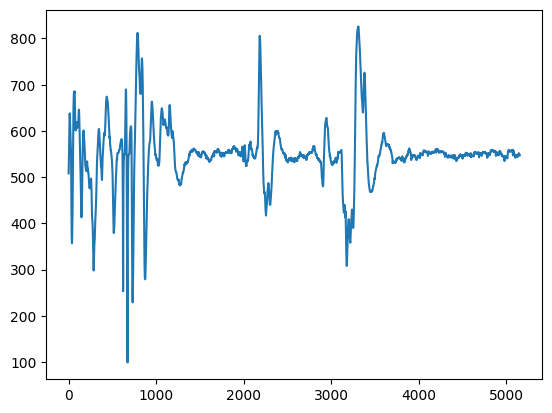

In [28]:
df['val'].plot()

In [29]:
df['val'].describe()

count    5151.000000
mean      549.333139
std        69.582682
min        99.000000
25%       537.000000
50%       550.000000
75%       560.000000
max       826.000000
Name: val, dtype: float64

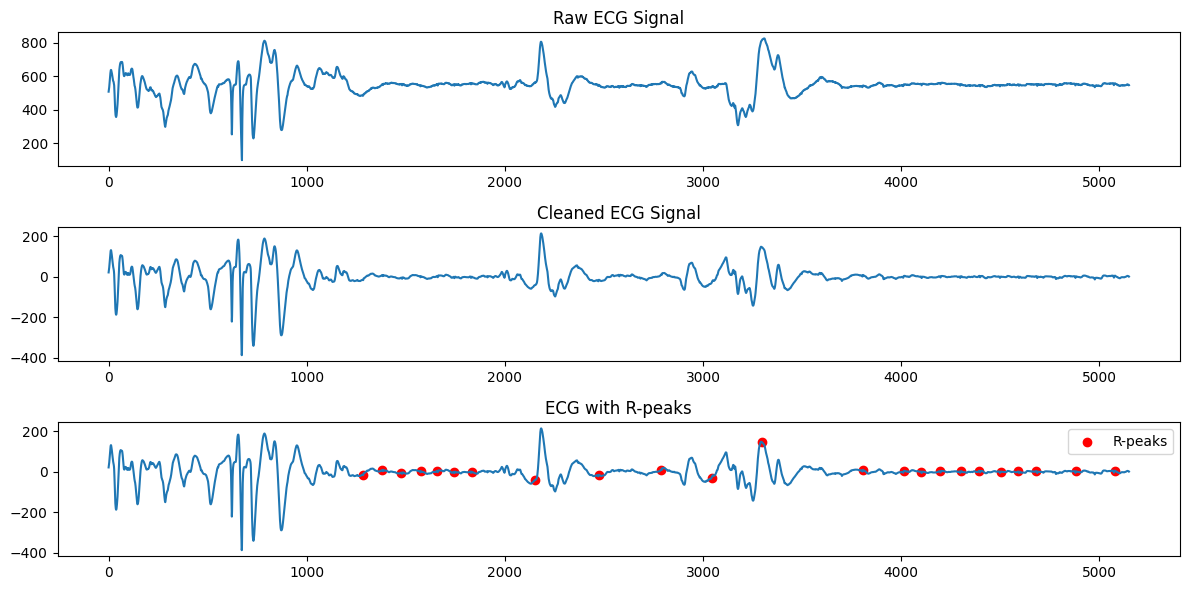

Average Heart Rate: 42.93 BPM

HRV Indices:
   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  1426.37115  947.428399         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...    HRV_IQRNN  \
0         NaN         NaN  888.548266  909.632946  ...  1245.867769   

   HRV_SDRMSSD  HRV_Prc20NN  HRV_Prc80NN  HRV_pNN50  HRV_pNN20   HRV_MinNN  \
0     1.066266   760.330579  2107.438017  63.636364  72.727273  669.421488   

     HRV_MaxNN   HRV_HTI  HRV_TINN  
0  4223.140496  7.333333     93.75  

[1 rows x 25 columns]


In [38]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the ECG data in a column named "val"

# Process the ECG signal using NeuroKit
# ecg_process returns a tuple of (processed_signal_dataframe, info_dict)
signals, info = nk.ecg_process(df["val"], sampling_rate=121)

# Now properly access the dataframe and info
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(3, 1, 1)
plt.plot(signals["ECG_Raw"])
plt.title("Raw ECG Signal")

# Clean signal
plt.subplot(3, 1, 2)
plt.plot(signals["ECG_Clean"])
plt.title("Cleaned ECG Signal")

# R-peaks
plt.subplot(3, 1, 3)
plt.plot(signals["ECG_Clean"])
plt.scatter(signals.index[signals["ECG_R_Peaks"] == 1], 
            signals["ECG_Clean"][signals["ECG_R_Peaks"] == 1], 
            color='red', label='R-peaks')
plt.title("ECG with R-peaks")
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and display heart rate metrics
heartrate = signals["ECG_Rate"].mean()
print(f"Average Heart Rate: {heartrate:.2f} BPM")

# Optional: Analyze heart rate variability 
# The info dictionary contains the peaks information needed for HRV analysis
hrv_indices = nk.hrv_time(info, sampling_rate=300)
print("\nHRV Indices:")
print(hrv_indices)

### ECG Signal quality

In [39]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt

# Process the ECG signal
signals, info = nk.ecg_process(df["val"], sampling_rate=121)

# The quality metrics are usually part of the signals DataFrame
# If there's a quality column in the signals DataFrame:
if "ECG_Quality" in signals.columns:
    average_quality = signals["ECG_Quality"].mean()
    print(f"Average Signal Quality: {average_quality:.4f}")
else:
    # If not in signals, check if it's in the info dictionary
    if "quality" in info:
        average_quality = info["quality"]
        print(f"Average Signal Quality: {average_quality:.4f}")
    else:
        # If signal quality wasn't calculated, you can calculate it
        # using the appropriate NeuroKit2 function
        quality = nk.ecg_quality(signals["ECG_Raw"], sampling_rate=121)
        average_quality = quality.mean()
        print(f"Average Signal Quality (calculated): {average_quality:.4f}")

Average Signal Quality: 0.7097


### Heart Beats / Cardiac Cycles

Type of cycles: <class 'dict'>
Number of keys: 23
Type of cycle data: <class 'pandas.core.frame.DataFrame'>
Sample of raw cycle data:               Signal  Index Label
-0.197309 -19.959353   1222     1
-0.193954 -19.777114   1223     ...
Shape of cycle data: (169, 3)
Converted data type: <class 'numpy.ndarray'>
Converted data dtype: float64
Converted data shape: (169,)
First few values after conversion: [-19.95935312 -19.77711362 -19.60427793 -19.1911279  -18.78794127]
Successfully created numeric data for 23 cycles
Plot saved as 'cardiac_cycles_numeric.png'
Average cycle plot saved as 'average_cardiac_cycle_numeric.png'


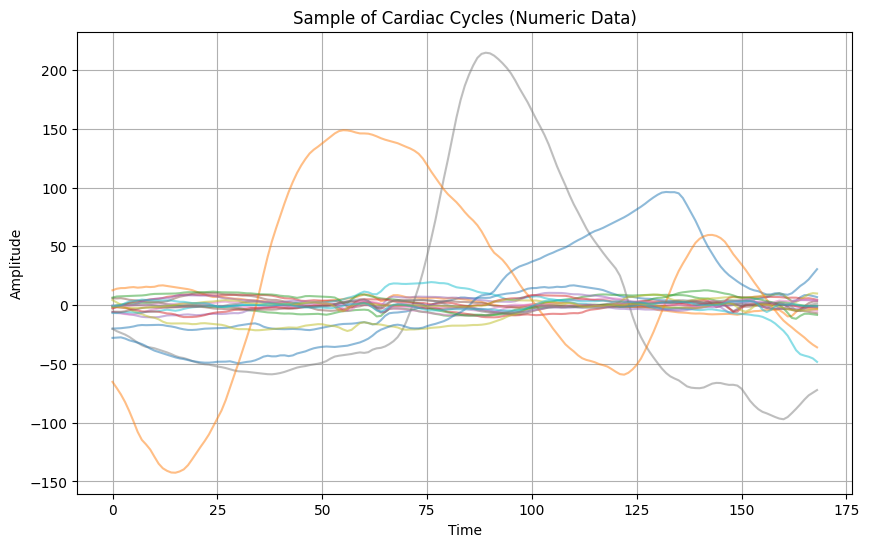

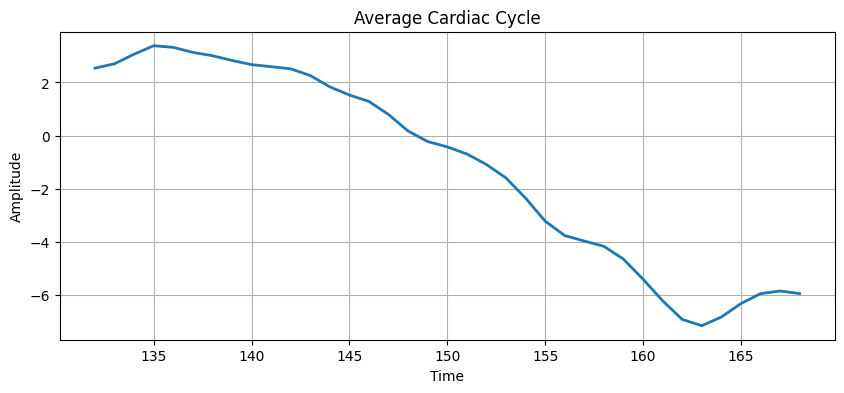

In [ ]:
# import neurokit2 as nk
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you've already processed your ECG data:
# # signals, info = nk.ecg_process(df["val"], sampling_rate=121)

# # Extract cardiac cycles using the correct approach
# cycles = nk.ecg_segment(signals["ECG_Clean"], 
#                         rpeaks=info["ECG_R_Peaks"], 
#                         sampling_rate=300)

# print(f"Type of cycles: {type(cycles)}")
# cycle_keys = list(cycles.keys())
# print(f"Number of keys: {len(cycle_keys)}")

# # Let's create a new dictionary with numeric values
# numeric_cycles = {}

# for key in cycle_keys:
#     # Get the cycle data
#     cycle_data = cycles[key]
    
#     # Print a sample of data to see what we're dealing with
#     if key == cycle_keys[0]:  # Just for the first key
#         print(f"Type of cycle data: {type(cycle_data)}")
#         print(f"Sample of raw cycle data: {str(cycle_data)[:100]}...")
#         print(f"Shape of cycle data: {cycle_data.shape if hasattr(cycle_data, 'shape') else 'No shape attribute'}")
    
#     # Try different conversion approaches
#     try:
#         # For numpy arrays
#         if isinstance(cycle_data, np.ndarray):
#             # Check if the array is multi-dimensional
#             if len(cycle_data.shape) > 1:
#                 # If multi-dimensional, use only the first column
#                 numeric_data = cycle_data[:, 0].astype(float)
#             elif cycle_data.dtype.kind in ['U', 'S', 'O']:
#                 # Convert strings to float - handle possible error values
#                 numeric_data = np.array([float(x) if x not in ['', 'nan', 'None', None] else np.nan for x in cycle_data])
#             else:
#                 numeric_data = cycle_data.astype(float)
        
#         # For lists
#         elif isinstance(cycle_data, list):
#             numeric_data = np.array([float(x) if x not in ['', 'nan', 'None', None] else np.nan for x in cycle_data])
        
#         # For pandas Series or DataFrame
#         elif isinstance(cycle_data, pd.Series):
#             numeric_data = cycle_data.astype(float).values
#         elif isinstance(cycle_data, pd.DataFrame):
#             # Use only the first column if it's a DataFrame
#             numeric_data = cycle_data.iloc[:, 0].astype(float).values
        
#         # For other types, try direct conversion
#         else:
#             numeric_data = np.array(cycle_data, dtype=float)
#             # Check if result is multi-dimensional
#             if len(numeric_data.shape) > 1:
#                 numeric_data = numeric_data[:, 0]  # Take first column
        
#         # Store in our new dictionary
#         numeric_cycles[key] = numeric_data
        
#         # Print conversion results for first key
#         if key == cycle_keys[0]:
#             print(f"Converted data type: {type(numeric_cycles[key])}")
#             print(f"Converted data dtype: {numeric_cycles[key].dtype}")
#             print(f"Converted data shape: {numeric_cycles[key].shape}")
#             print(f"First few values after conversion: {numeric_cycles[key][:5]}")
    
#     except Exception as e:
#         print(f"Error converting cycle {key}: {e}")
#         # If conversion fails, try element by element
#         try:
#             # Handle the data as a string and try to parse it
#             str_data = str(cycle_data)
#             # Try to extract numeric values
#             import re
#             matches = re.findall(r"[-+]?\d*\.\d+|\d+", str_data)
#             if matches:
#                 numeric_data = np.array([float(x) for x in matches])
#                 numeric_cycles[key] = numeric_data
#                 print(f"Extracted {len(numeric_data)} numeric values using regex")
#             else:
#                 print(f"No numeric values found in cycle {key}")
#         except Exception as e2:
#             print(f"Second attempt also failed for cycle {key}: {e2}")

# # Now try to plot with the numeric values
# if numeric_cycles:
#     print(f"Successfully created numeric data for {len(numeric_cycles)} cycles")
    
#     # Plot all cycles
#     plt.figure(figsize=(10, 6))
#     for i, (key, data) in enumerate(numeric_cycles.items()):
#         if i < 20:  # Limit to 20 cycles for clarity
#             plt.plot(data, alpha=0.5)
#     plt.title("Sample of Cardiac Cycles (Numeric Data)")
#     plt.xlabel("Time")
#     plt.ylabel("Amplitude")
#     plt.grid(True)
#     plt.savefig('cardiac_cycles_numeric.png')
#     print("Plot saved as 'cardiac_cycles_numeric.png'")
    
#     # Calculate and plot average cycle
#     # First ensure all data arrays are 1D
#     for key in list(numeric_cycles.keys()):
#         if len(numeric_cycles[key].shape) > 1:
#             print(f"Warning: Cycle {key} has shape {numeric_cycles[key].shape}, using first column only")
#             numeric_cycles[key] = numeric_cycles[key][:, 0]
    
#     # Find the maximum length
#     max_length = max(len(data) for data in numeric_cycles.values())
    
#     # Initialize arrays for sum and count
#     sum_array = np.zeros(max_length)
#     count_array = np.zeros(max_length)
    
#     # Sum up all cycles
#     for data in numeric_cycles.values():
#         length = len(data)
#         sum_array[:length] += data
#         count_array[:length] += 1
    
#     # Calculate average (avoiding division by zero)
#     avg_cycle = np.divide(sum_array, count_array, out=np.zeros_like(sum_array), where=count_array!=0)
    
#     # Plot average cycle
#     plt.figure(figsize=(10, 4))
#     plt.plot(avg_cycle, linewidth=2)
#     plt.title("Average Cardiac Cycle")
#     plt.xlabel("Time")
#     plt.ylabel("Amplitude")
#     plt.grid(True)
#     plt.savefig('average_cardiac_cycle_numeric.png')
#     print("Average cycle plot saved as 'average_cardiac_cycle_numeric.png'")
# else:
#     print("Failed to create numeric data")

# # Try to display plots
# try:
#     plt.show()
# except Exception as e:
#     print(f"Error displaying plots: {e}")
#     print("But plots have been saved as PNG files.")

In [ ]:
# # Unpack the tuple for clarity
# signals, info = bio

# # The ECG quality data is in the signals DataFrame
# average_quality = signals['ECG_Quality'].mean()
# print(f"Average Signal Quality: {average_quality:.4f}")

# # You can also visualize the quality over time
# plt.figure(figsize=(12, 4))
# plt.plot(signals['ECG_Quality'])
# plt.title('ECG Signal Quality Over Time')
# plt.ylabel('Quality')
# plt.xlabel('Samples')
# plt.grid(True)
# plt.show()

# # If you want to see other ECG features
# print(f"Heart Rate Statistics:")
# print(f"Mean HR: {signals['ECG_Rate'].mean():.1f} BPM")
# print(f"Min HR: {signals['ECG_Rate'].min():.1f} BPM")
# print(f"Max HR: {signals['ECG_Rate'].max():.1f} BPM")

NameError: name 'bio' is not defined

### Heart Rate Variability (HRV)

In [ ]:
#bio["ECG"]["HRV"]

In [ ]:
# # Unpack the bio tuple correctly
# signals, info = bio

# # Use pandas or numpy for z-scoring instead
# # Method 1: Using pandas directly
# z_scored_ecg = (signals[["ECG_Clean"]] - signals[["ECG_Clean"]].mean()) / signals[["ECG_Clean"]].std()

# # Or Method 2: Using numpy
# # import numpy as np
# # z_scored_ecg = pd.DataFrame((signals["ECG_Clean"] - np.mean(signals["ECG_Clean"])) / np.std(signals["ECG_Clean"]), 
# #                            index=signals.index, columns=["ECG_Clean_Z"])

# # Plot the z-scored segment
# z_scored_ecg[1000:2500].plot(figsize=(12, 4))
# plt.title('Z-Scored ECG Signal (Samples 1000-2500)')
# plt.ylabel('Z-Score')
# plt.grid(True)
# plt.show()

NameError: name 'bio' is not defined

Loaded data from: C:\Users\rohit\OneDrive\Desktop\edigithub\ecg_records.csv
File size: 103028 bytes
Number of rows: 5151
Columns: ['ts', 'val']

Preview of data (first 5 rows):
              ts  val
0  1746847784807  508
1  1746847784815  516
2  1746847784824  525
3  1746847784830  535
4  1746847784837  550

Using column 'val' for ECG data
Number of NaN values in the ECG data: 0


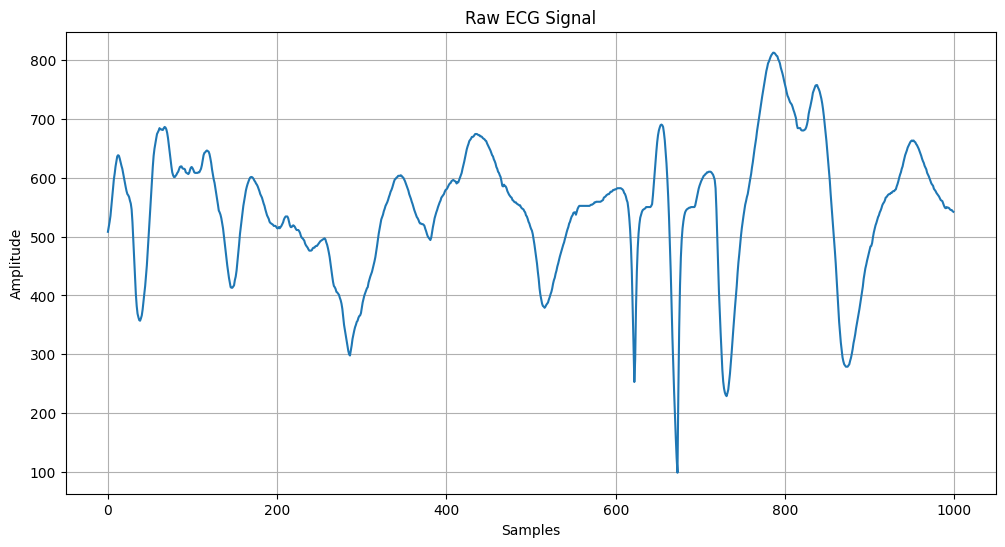


Success! Filtered ECG saved to: c:\Users\rohit\OneDrive\Documents\ecg_filtered.csv
File size: 102861 bytes


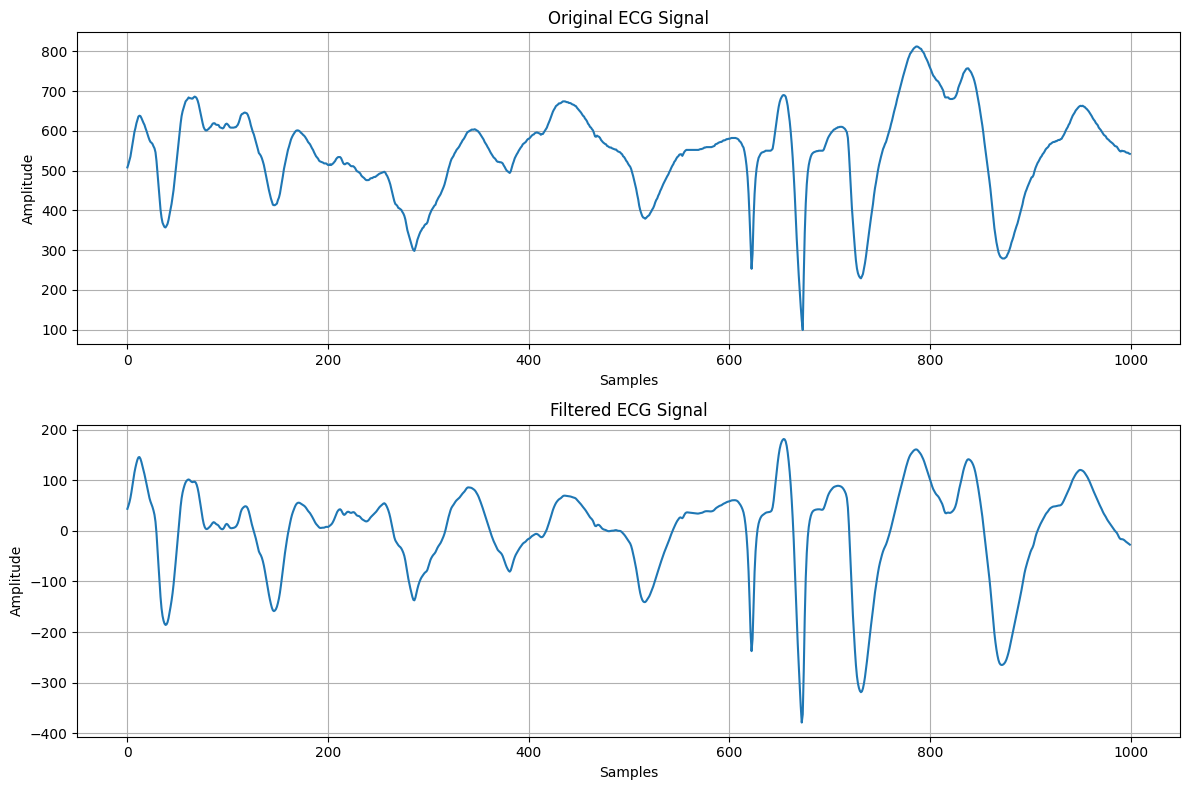

In [43]:
import pandas as pd
import neurokit2 as nk
import os
import matplotlib.pyplot as plt
import numpy as np

# Load your existing heartbeat CSV file
csv_path = (r"C:\Users\rohit\OneDrive\Desktop\edigithub\ecg_records.csv")
df = pd.read_csv(csv_path)

# Display info about the loaded file
print(f"Loaded data from: {os.path.abspath(csv_path)}")
print(f"File size: {os.path.getsize(csv_path)} bytes")
print(f"Number of rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

# Show a preview of the data
print("\nPreview of data (first 5 rows):")
print(df.head())

# Assuming your heartbeat values are in a column - find which column contains the ECG data
# This might be named differently in your file, adjust as needed
ecg_column = None
for col in df.columns:
    if col.lower() in ['val', 'ecg', 'value', 'ecg_raw', 'heartbeat', 'heart_rate']:
        ecg_column = col
        break

if ecg_column is None:
    print("\nCouldn't automatically identify the ECG column.")
    print(f"Available columns are: {df.columns.tolist()}")
    # You would need to manually specify the column name here
    ecg_column = 'val'  # Adjust this to match your column name

print(f"\nUsing column '{ecg_column}' for ECG data")

# Check for NaN values
nan_count = df[ecg_column].isna().sum()
print(f"Number of NaN values in the ECG data: {nan_count}")

if nan_count > 0:
    print("Cleaning data by removing NaN values...")
    # Option 1: Remove rows with NaN values
    df_clean = df.dropna(subset=[ecg_column])
    print(f"Rows after removing NaN values: {len(df_clean)}")
    
    # Option 2: Or interpolate NaN values (might be better for time series)
    df_interp = df.copy()
    df_interp[ecg_column] = df_interp[ecg_column].interpolate(method='linear')
    nan_count_after = df_interp[ecg_column].isna().sum()
    print(f"NaN values after interpolation: {nan_count_after}")
    
    # If there are still NaN values at the beginning or end that couldn't be interpolated
    if nan_count_after > 0:
        print("Removing remaining NaN values after interpolation...")
        df_interp = df_interp.dropna(subset=[ecg_column])
    
    # Let's use the interpolated data
    df = df_interp
    print(f"Using interpolated data with {len(df)} rows")

# Plot the raw data to examine it
plt.figure(figsize=(12, 6))
plt.plot(df[ecg_column][:1000])  # First 1000 samples for clarity
plt.title("Raw ECG Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Process the ECG signal using NeuroKit
sampling_rate = 121  # Adjust based on your data's actual sampling rate
try:
    # First make sure we have a valid numpy array
    ecg_data = np.array(df[ecg_column]).astype(float)
    
    # Check for any remaining invalid values
    if np.isnan(ecg_data).any() or np.isinf(ecg_data).any():
        print("Warning: Data still contains NaN or Inf values. Fixing...")
        # Replace NaN or Inf with the mean value
        mean_val = np.nanmean(ecg_data[np.isfinite(ecg_data)])
        ecg_data = np.nan_to_num(ecg_data, nan=mean_val, posinf=mean_val, neginf=mean_val)
    
    # Process the ECG
    signals, info = nk.ecg_process(ecg_data, sampling_rate=sampling_rate)
    
    # Filter the ECG data
    filtered_ecg = nk.signal_filter(signals["ECG_Clean"], 
                                   lowcut=0.5, 
                                   highcut=40, 
                                   sampling_rate=sampling_rate)
    
    # Create a new DataFrame for the filtered data
    filtered_df = pd.DataFrame({"ECG_Filtered": filtered_ecg})
    
    # Save the filtered data to a new CSV file
    output_path = "ecg_filtered.csv"
    filtered_df.to_csv(output_path, index=False)
    
    # Verify the file was created
    if os.path.exists(output_path):
        print(f"\nSuccess! Filtered ECG saved to: {os.path.abspath(output_path)}")
        print(f"File size: {os.path.getsize(output_path)} bytes")
        
        # Plot the original and filtered signals for comparison
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 1, 1)
        plt.plot(ecg_data[:1000])  # Plot first 1000 points for clarity
        plt.title("Original ECG Signal")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.grid(True)
        
        plt.subplot(2, 1, 2)
        plt.plot(filtered_ecg[:1000])  # Plot first 1000 points for clarity
        plt.title("Filtered ECG Signal")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nError: Failed to create {output_path}")

except Exception as e:
    print(f"Error processing ECG data: {e}")
    
    # As a fallback, try a simpler filtering approach without NeuroKit
    print("\nTrying alternative approach...")
    
    from scipy import signal
    
    # Get the cleaned data
    ecg_data = np.array(df[ecg_column]).astype(float)
    
    # Replace any NaN or Inf values
    mean_val = np.nanmean(ecg_data[np.isfinite(ecg_data)])
    ecg_data = np.nan_to_num(ecg_data, nan=mean_val, posinf=mean_val, neginf=mean_val)
    
    # Apply a bandpass filter (0.5-40 Hz)
    b, a = signal.butter(4, [0.5/(sampling_rate/2), 40/(sampling_rate/2)], btype='band')
    filtered_ecg = signal.filtfilt(b, a, ecg_data)
    
    # Save the filtered data
    filtered_df = pd.DataFrame({"ECG_Filtered": filtered_ecg})
    filtered_df.to_csv("ecg_filtered.csv", index=False)
    
    print(f"Filtered ECG saved to: {os.path.abspath('ecg_filtered.csv')}")
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(ecg_data[:1000])
    plt.title("Original ECG Signal")
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(filtered_ecg[:1000])
    plt.title("Filtered ECG Signal (Alternative Method)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Loaded filtered ECG data from c:\Users\rohit\OneDrive\Documents\ecg_filtered.csv
Number of data points: 5151

Preview of filtered data:
   ECG_Filtered
0     43.557691
1     49.512001
2     56.255928
3     65.063109
4     76.417483


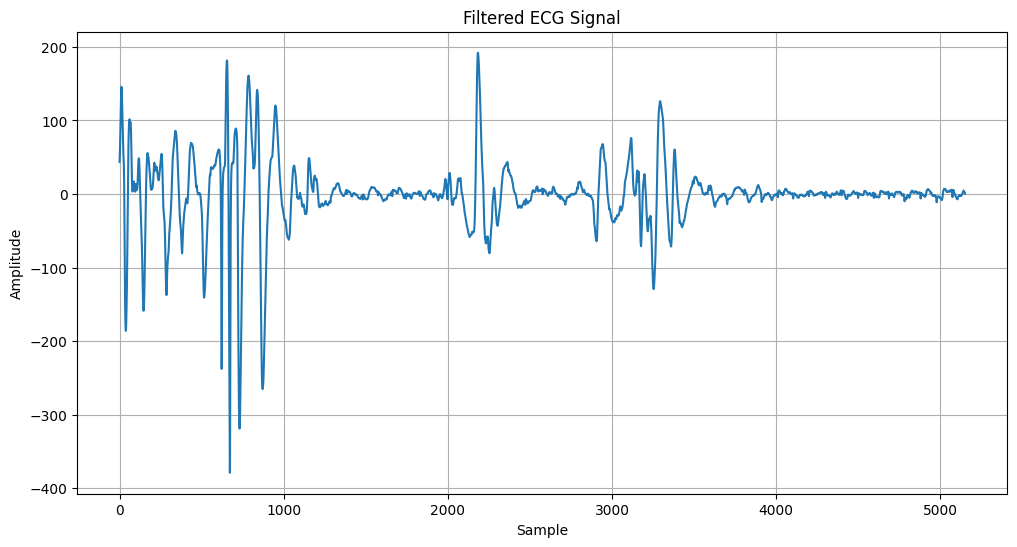

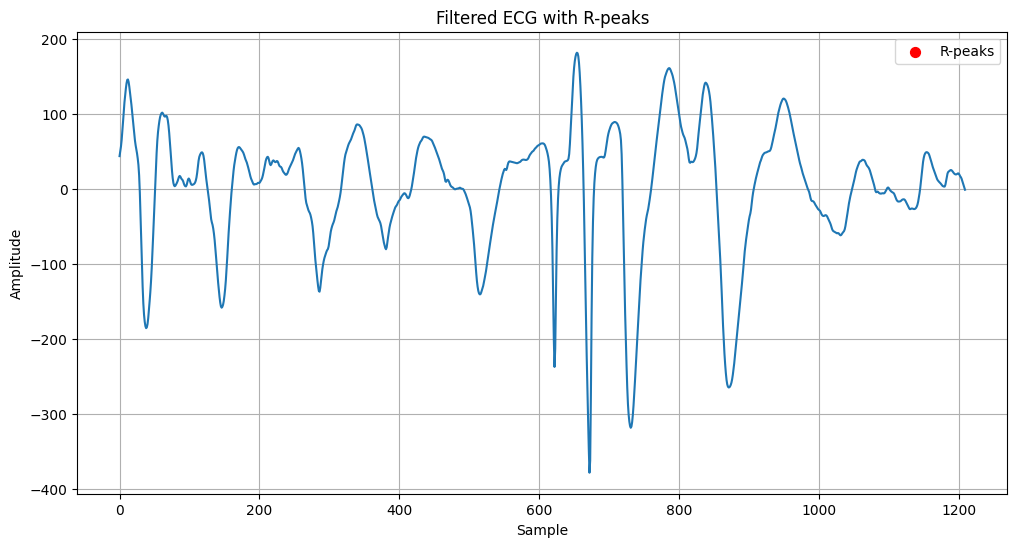

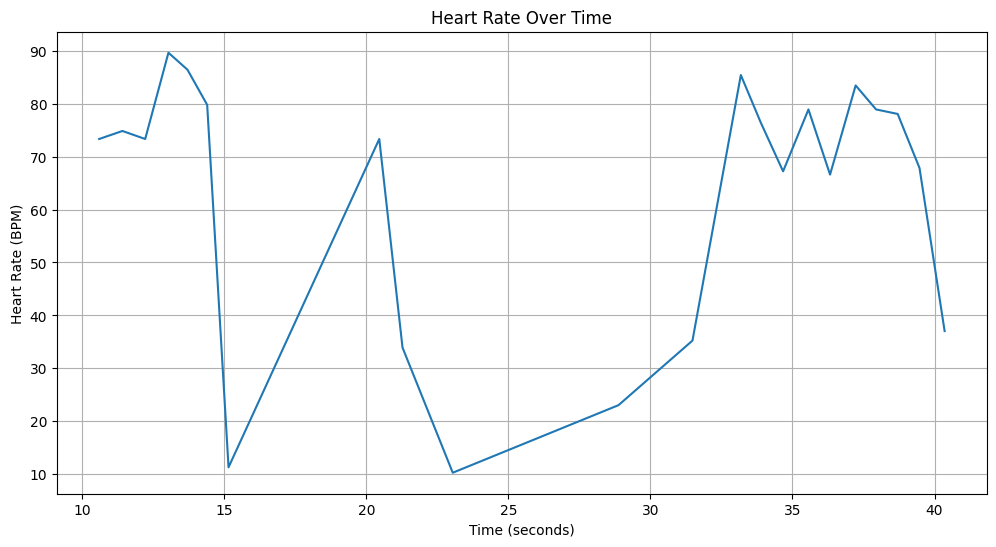


HRV Time Domain Metrics:
MeanNN: 11.7882
SDNN: 11.7948
SDANN1: nan
SDNNI1: nan
SDANN2: nan
SDNNI2: nan
SDANN5: nan
SDNNI5: nan
RMSSD: 15.2215
SDSD: 15.5940
CVNN: 1.0006
CVSD: 1.2912
MedianNN: 6.7618
MadNN: 0.9620
MCVNN: 0.1423
IQRNN: 5.6178
SDRMSSD: 0.7749
Prc20NN: 6.2291
Prc80NN: 13.9335
pNN50: 0.0000
pNN20: 18.1818
MinNN: 5.5324
MaxNN: 48.2207
HTI: 1.3750
TINN: 0.0000

Heart rate time series saved to 'heart_rate_timeseries.csv'
HRV metrics saved to 'hrv_metrics.csv'


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# First, let's verify we have the filtered.csv file
filtered_path = "ecg_filtered.csv"

if not os.path.exists(filtered_path):
    print(f"Error: {filtered_path} not found!")
    # List CSV files that do exist
    csv_files = [f for f in os.listdir() if f.endswith('.csv')]
    if csv_files:
        print(f"Available CSV files: {csv_files}")
    else:
        print("No CSV files found in current directory")
else:
    # Load the filtered ECG data
    filtered_df = pd.read_csv(filtered_path)
    print(f"Loaded filtered ECG data from {os.path.abspath(filtered_path)}")
    print(f"Number of data points: {len(filtered_df)}")
    
    # Preview the data
    print("\nPreview of filtered data:")
    print(filtered_df.head())
    
    # 1. Visualize the filtered ECG signal
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_df['ECG_Filtered'])
    plt.title("Filtered ECG Signal")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()
    
    # 2. Detect R-peaks in the filtered signal
    import neurokit2 as nk
    
    # Assume 121 Hz sampling rate (adjust if needed)
    sampling_rate = 121
    
    # Detect R-peaks
    r_peaks = nk.ecg_peaks(filtered_df['ECG_Filtered'], sampling_rate=sampling_rate)[0]['ECG_R_Peaks']
    
    # Show R-peaks on the signal
    plt.figure(figsize=(12, 6))
    # Plot a segment of the signal (first 10 seconds) for better visibility
    segment_length = 10 * sampling_rate
    plt.plot(filtered_df['ECG_Filtered'][:segment_length])
    
    # Find indices where r_peaks is True within our segment
    r_peak_indices = np.where(r_peaks[:segment_length])[0]
    plt.scatter(r_peak_indices, filtered_df['ECG_Filtered'].iloc[r_peak_indices], 
                color='red', s=50, label='R-peaks')
    
    plt.title("Filtered ECG with R-peaks")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 3. Calculate heart rate from R-peaks
    r_peak_indices = np.where(r_peaks)[0]
    rr_intervals = np.diff(r_peak_indices) / sampling_rate  # in seconds
    heart_rates = 60 / rr_intervals  # in beats per minute
    
   
    
    # Plot heart rate over time
    plt.figure(figsize=(12, 6))
    # Create time array (midpoints of RR intervals)
    time_points = r_peak_indices[:-1] / sampling_rate
    plt.plot(time_points, heart_rates)
    plt.title("Heart Rate Over Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Heart Rate (BPM)")
    plt.grid(True)
    plt.show()
    
    # 4. Calculate HRV metrics
    try:
        # Get R-peaks in seconds
        r_peaks_sec = r_peak_indices / sampling_rate
        
        # Calculate HRV metrics
        hrv_time = nk.hrv_time(r_peaks_sec, sampling_rate=sampling_rate)
        
        print("\nHRV Time Domain Metrics:")
        for col in hrv_time.columns:
            print(f"{col.replace('HRV_', '')}: {hrv_time[col].values[0]:.4f}")
        
        # If you have enough data, also calculate frequency domain metrics
        if len(r_peaks_sec) > 120:  # Need enough data for frequency analysis
            hrv_freq = nk.hrv_frequency(r_peaks_sec, sampling_rate=sampling_rate)
            
            print("\nHRV Frequency Domain Metrics:")
            for col in hrv_freq.columns:
                print(f"{col.replace('HRV_', '')}: {hrv_freq[col].values[0]:.4f}")
    
    except Exception as e:
        print(f"\nError calculating HRV metrics: {e}")
        print("This usually happens if there aren't enough R-peaks detected or the signal quality is poor.")
        print("Make sure you have at least 30 seconds of good quality ECG data.")
    
    # 5. Export processed results
    try:
        # Create heart rate time series
        hr_df = pd.DataFrame({
            "Time_sec": time_points,
            "HeartRate_BPM": heart_rates
        })
        
        # Save heart rate data
        hr_df.to_csv("heart_rate_timeseries.csv", index=False)
        print("\nHeart rate time series saved to 'heart_rate_timeseries.csv'")
        
        # If HRV was calculated successfully, save those metrics too
        if 'hrv_time' in locals():
            hrv_time.to_csv("hrv_metrics.csv", index=False)
            print("HRV metrics saved to 'hrv_metrics.csv'")
    
    except Exception as e:
        print(f"\nError saving results: {e}")

In [ ]:
# # taken from this https://www.sciencedirect.com/science/article/pii/S0735109797005548
# # for age 20-29
# hrv = {
#     'research' : {
#         '20–29': {
#             'SDNN' : '153 ± 44 ms',
#             'SDANN': '137 ± 43 ms',
#             'rMSSD': '43 ± 19 ms',
#             'pNN50': '18 ± 13 %',
#             'HR': '79 ± 10 beats/min'
#         }
        
#     }
# }

In [ ]:
# # Print specific HRV metrics you were interested in
# if 'HRV_SDNN' in hrv_indices.columns:
#     print(f"\nSDNN: {hrv_indices['HRV_SDNN'].values[0]:.5f} ms")
# if 'HRV_RMSSD' in hrv_indices.columns:
#     print(f"RMSSD: {hrv_indices['HRV_RMSSD'].values[0]:.5f} ms")
# if 'HRV_pNN50' in hrv_indices.columns:
#     print(f"pNN50: {hrv_indices['HRV_pNN50'].values[0]:.5f} %")

NameError: name 'hrv_indices' is not defined